In [1]:
from os import path
from tabulate import tabulate
from process import *

In [27]:
# Set up dirs/filenames
results_dir = 'perftest/results'
hosts = [20, 30, 40, 50]
servers = [host/2 for host in hosts]
tests = [6, 5, 4, 4] # TODO: Make this flexible (look os.path)
host_dirs = [[results_dir + '/results_{}hosts_0{}'.format(num_hosts, str(i)) 
               for i in range(1, num_tests+1)] for num_hosts,num_tests in zip(hosts,tests)]
# Map from num_hosts to paths of results
host_dirs = dict(zip(hosts, host_dirs))  

metrics = ['transfer', 'throughput', 'latency']
units = ['MBytes', 'MBit/s', '\u03BCs']
protocols = ['dsp', 'ecmp', 'ksp']
exps = ['eight', 'single']
# Filenames in each result directory (all the same)
filenames = [['{0}_{1}.txt'.format(p, e) for p in protocols] for e in exps]
filenames = dict(zip(exps, filenames))

# Data Visualizations

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_metric_vs_hosts(ecmp_data, ksp_data, dsp_data, metric, num_conn):
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(8, 4.5))
    servers = []
    for i in range(len(hosts)):
        servers.append(hosts[i]/2)

    ax.plot(servers, ecmp_data, label='ECMP')
    ax.plot(servers, ksp_data, label='8-Shortest Paths')
    ax.plot(servers, dsp_data, label='8-Diverse Short Paths')
    
    unit = units[metrics.index(metric)]
    plt.xlabel('Number of Server Pairs', fontsize=12)
    plt.ylabel('Average {} ({})'.format(metric.capitalize(), unit), fontsize=12)

    plt.suptitle('{}'.format(metric.capitalize()), fontsize=13)
    if num_conn == 'single':
        plt.title('{} Flow / Server Pair'.format(num_conn.capitalize()), fontsize=11)
    else:
        plt.title('{} Parallel Flows / Server Pair'.format(num_conn.capitalize()), fontsize=11)

    ax.legend()

    t_min, t_max = 0, np.max([ecmp_data, ksp_data, dsp_data])
    plt.xticks(servers)
    if metric == 'latency':
        plt.ylim(200000, 600000)   

    plt.show()

In [5]:
def aggregate_average(num_hosts, num_conn):
    dir = host_dirs[num_hosts]
    files = filenames[num_conn]
    ecmp, ksp, dsp = [], [], []
    for subdir in dir:
        dsp.append(read_file(subdir + '/' + files[0]))
        ecmp.append(read_file(subdir + '/' + files[1]))
        ksp.append(read_file(subdir + '/' + files[2]))
    results = [np.mean(results, 0) for results in [dsp, ecmp, ksp]]
    results = [dict(zip(metrics, result)) for result in results]
        
    return dict(zip(protocols, results))

In [6]:
def plot_results(num_conn, metric):
    data = [aggregate_average(num_hosts, num_conn) for num_hosts in hosts]

    ecmp_data = [sub_data['ecmp'][metric] for sub_data in data]
    ksp_data = [sub_data['ksp'][metric] for sub_data in data]
    dsp_data = [sub_data['dsp'][metric] for sub_data in data]
        
    plot_metric_vs_hosts(ecmp_data, ksp_data, dsp_data, metric, num_conn)

## Throughput

### Single-Flow

<Figure size 432x288 with 0 Axes>

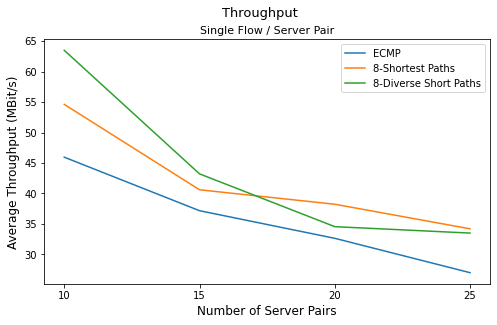

In [7]:
plot_results('single', 'throughput')

### Eight-Flow

<Figure size 432x288 with 0 Axes>

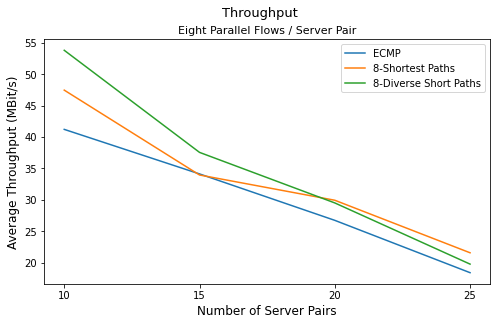

In [8]:
plot_results('eight', 'throughput')

## Latency

### Single-Flow

<Figure size 432x288 with 0 Axes>

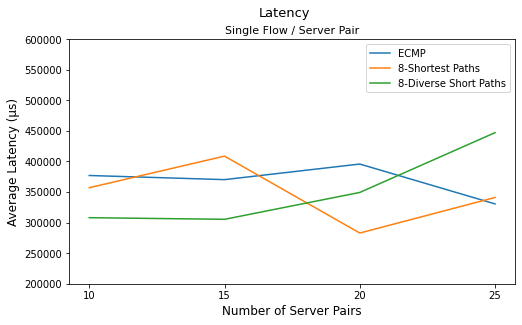

In [9]:
plot_results('single', 'latency')

### Eight-flow

<Figure size 432x288 with 0 Axes>

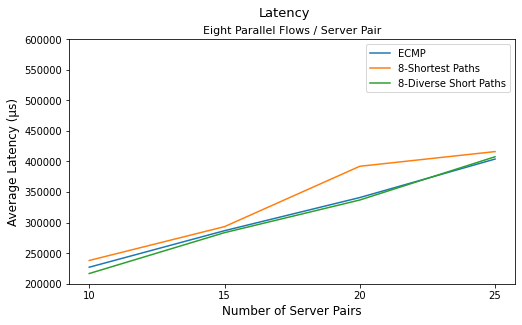

In [10]:
plot_results('eight','latency')

### Latency Variance

In [31]:
def aggregate_metrics(num_hosts, num_flows):
    dir = host_dirs[num_hosts]
    files = filenames[num_flows]
    ecmp, ksp, dsp = [], [], []
    for subdir in dir:
        dsp.append(read_file(subdir + '/' + files[0]))
        ecmp.append(read_file(subdir + '/' + files[1]))
        ksp.append(read_file(subdir + '/' + files[2]))
    results = np.array([dsp, ecmp, ksp])
    return dict(zip(protocols, results))

In [12]:
ecmp_l = np.array([result['ecmp'][:,2] for result in single_results])
ksp_l = np.array([result['ksp'][:,2] for result in single_results])
dsp_l = np.array([result['dsp'][:,2] for result in single_results])

In [18]:
ecmp_y = [item for sublist in ecmp_l for item in sublist]
ksp_y = [item for sublist in ksp_l for item in sublist]
dsp_y = [item for sublist in dsp_l for item in sublist]
x = np.array([[hosts[i]]*len(result) for i, result in enumerate(y)])
x = [item for sublist in x for item in sublist]

<Figure size 432x288 with 0 Axes>

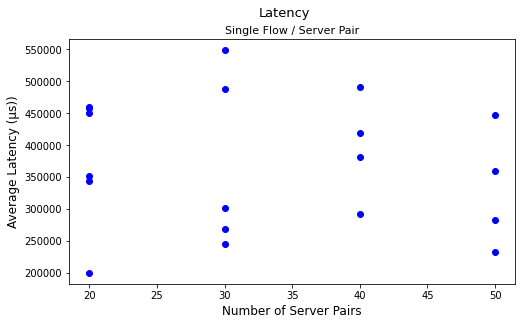

In [33]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 4.5))
plt.title('Single Flow / Server Pair', fontsize=11)
plt.suptitle('Latency', fontsize=13)
plt.xlabel('Number of Server Pairs', fontsize=12)
plt.ylabel('Average Latency (\u03BCs))', fontsize=12)
plt.scatter(x,ecmp_y, c='b', marker="o", label='ECMP')

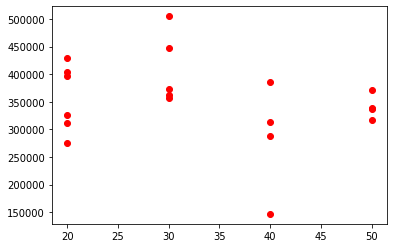

In [29]:

plt.scatter(x,ksp_y, c='r', marker="o", label='8-Shortest Paths')

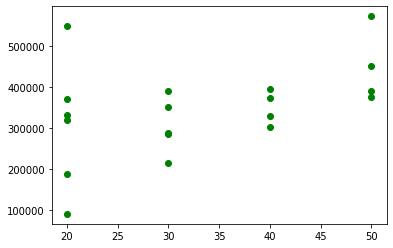

In [30]:

plt.scatter(x,dsp_y, c='g', marker="o", label='8-Diverse Short Paths')